# Assignment on given data set on data analysis
# Data analysis by Jatin Thakwani 

   ---------------------------------------------
   
   Importing the required libraries for our EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
%matplotlib inline
sns.set(color_codes=True)

-----------------------------------------------------------------
Loading data into a data frame.

In [2]:
df=pd.read_excel("sales_full_data.xlsx")

In [3]:
#To display the top 5 rows and bottom 5 rows
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.tail(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.0,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
186849,259357.0,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


In [5]:
#checking the type of data
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [6]:
#checking the null values in our Dataset
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


--------------------------------------------------
So now we have some null rows that we have to drop

In [8]:
# Dropping null/na 
df=df.dropna()
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

--------------------------------------------------------------
Converting object types to string and float types and dropping the duplicate string types

In [9]:
df.convert_dtypes().dtypes 

Order ID            object
Product             string
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    string
dtype: object

In [10]:
df=df.drop(df[df['Order ID']=='Order ID'].index)

In [11]:
#converting string/object type to int
df["Quantity Ordered"] = df["Quantity Ordered"].astype(float)
df["Price Each"] = df["Price Each"].astype(float)
df["Order ID"] = df["Order ID"].astype(float)

In [12]:
df.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [13]:
#extracting month
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Month']=df['Order Date'].dt.month

In [14]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


In [15]:
# df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


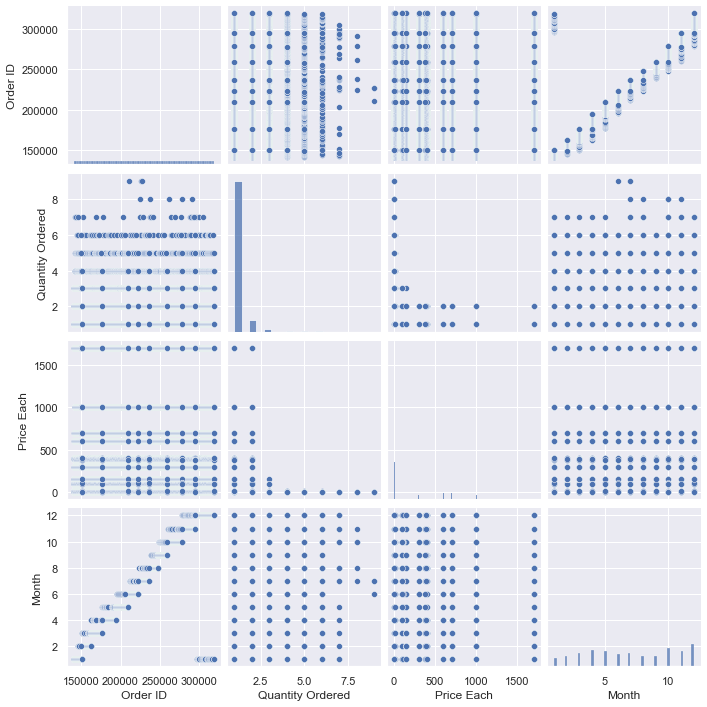

In [17]:
sns.pairplot(df)

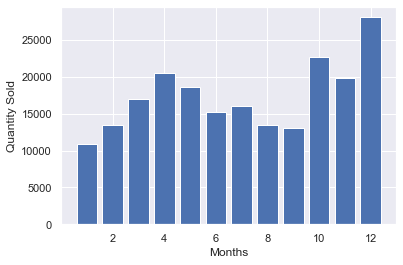

In [18]:
months=range(1,13)
quantPerMonth=df.groupby('Month').sum()

plt.bar(months,quantPerMonth['Quantity Ordered'])
plt.xlabel('Months')
plt.ylabel('Quantity Sold')
plt.show()

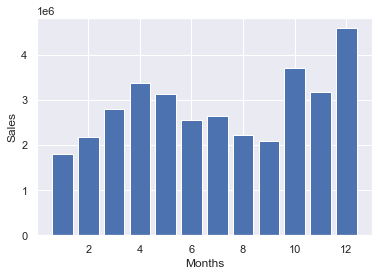

In [19]:
# Similarly for the total sales price
months=range(1,13)
salesPerMonth=df.groupby('Month').sum()
plt.bar(months,salesPerMonth['Price Each'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

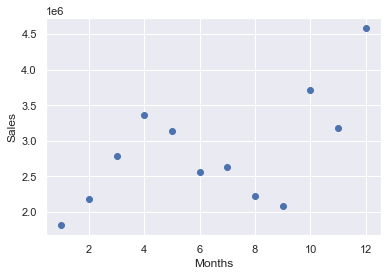

In [20]:
months=range(1,13)
salesPerMonth=df.groupby('Month').sum()
plt.scatter(months,salesPerMonth['Price Each'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

# Q1)Which month had the highest and lowest sales?
# So from this we can check that December has the highest sales and more quantities sold as well as we can even find the lowest sales month from just looking at the plots above.
---------------------------------------------------------------------------

In [21]:
df['Hour']=df['Order Date'].dt.hour

In [22]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9
...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17


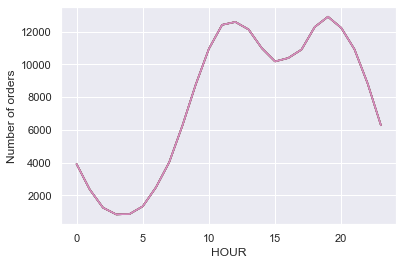

In [23]:
quantityPerHour=df.groupby(['Hour']).count()
hours=[hour for hour,data in df.groupby(['Hour'])]
plt.plot(hours,quantityPerHour)
plt.xlabel('HOUR')
plt.ylabel('Number of orders')
plt.show()

# Q2) What Time Should We Display Advertisements to Maximize Likelihood of Customer’s Buying Product?
# So according to the graph we just plotted above its visible that best time to advertise is before 12 PM and 7PM 
------------------------------------------------------------------------


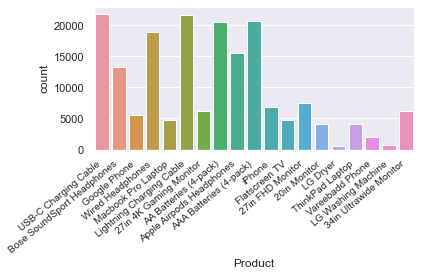

In [40]:
ax=sns.countplot(x=df['Product'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right",fontsize=10)
plt.tight_layout()
plt.show()

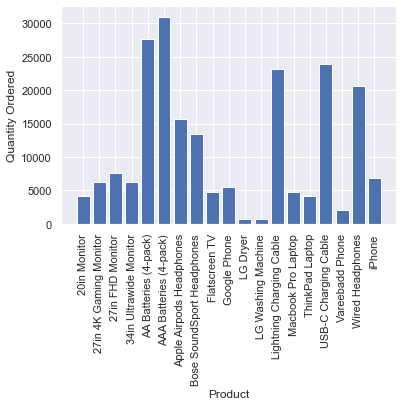

In [45]:
prod=df.groupby('Product')
quantity_ordered=prod.sum()['Quantity Ordered']
prods=[product_1 for product_1,df in prod ]

plt.bar(prods,quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(prods,rotation="vertical")
plt.show()

# Q3)What product sold the most? 

# AAA Batteries(4 pack) is the most sold product. Because it’s cheaper than other products and has high demand.